In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt


In [2]:
## some helper functions for the analysis

def rename_countries(x,country_names):
    for key,val in country_names.items():
        x.cntry.loc[x.cntry == key] = val


def return_ideos(x,ids,var):
    """
 Better to have the df in a tidy format and create a second df with only the proper 
    """
    ideo = (pd.melt(x,id_vars = ids, value_vars = var)
            .rename(columns = {"cntry": "país"}))
    #ideo = ideo.loc[(ideo["país"] != "Italy") & (ideo["país"] != "Czech Republic")]
    valid_ideo = ideo.loc[ideo["value"]<=10.0]

    return ideo, valid_ideo


def create_validity_table(var,valid_var,column):

    """
Not all responses are valid. This fn prints a latex table to show that.
    """

    total_N = var[column].value_counts().rename("total_N")
    valid_N = valid_var[column].value_counts().rename("valid_N")

    validity_table = pd.concat([total_N, valid_N], axis = 1)
    validity_table["fraction_valid"] = validity_table.valid_N.div(validity_table.total_N, \
                                                                  axis = "index").round(2)
    #validity_table = validity_table.drop("valid_N",axis = 1)

    print(validity_table.to_latex())




def countries_plot(df,facet_col,map_val, year):

    """
All countries plot for a year of the ESS
    """

    sns.set(style="white", palette="muted", color_codes=True)


    g = (sns.FacetGrid(df,col = facet_col, col_wrap = 5)
         .map(sns.distplot, map_val,hist = False, kde_kws={"shade": True})
         .set_titles("{col_name}")
         .set_ylabels("Densidade")
         .set_xlabels("Posicionamento Esquerda-direita")
         .fig.subplots_adjust(hspace = 0.5))

    plt.suptitle("ESS {}- Posicionamento Político".format(year), y = 1.01)
    plt.savefig("ess_{}_plots.pdf".format(year), bbox_inches='tight',\
                pad_inches=0.2, dpi = 150)






In [3]:
# countries i'll plot

country_names = {"AT": "Áustria",  "BE": "Bélgica",  "CH": "Suíça", "CZ": "República Checa", "DE": "Alemanha" , "DK": "Dinamarca", "ES": "Espanha", "FI": "Finlândia", "FR": "França", "GB": "Reino Unido", "GR": "Grécia",  "HU": "Hungria", "IE": "Irlanda", "IL": "Israel", "IT": "Itália", "LU": "Luxemburgo", "NL": "Países Baixos", "NO": "Noruega", "PL": "Polônia", "PT": "Portugal", "SE": "Suécia", "SI": "Eslovênia"}


In [4]:
# loading the datasets

ess2002 = pd.read_stata("ESS_DATA/2002/ESS1e06_5.dta",convert_categoricals = False)

ess2004 = pd.read_stata("ESS_DATA/2004/ESS2e03_5.dta",convert_categoricals = False)

ess2006  = pd.read_stata("ESS_DATA/2006/ESS3e03_6.dta",convert_categoricals = False)

ess2008  = pd.read_stata("ESS_DATA/2008/ESS4e04_4.dta",convert_categoricals = False)

ess2010  = pd.read_stata("ESS_DATA/2010/ESS5e03_3.dta",convert_categoricals = False)

ess2012  = pd.read_stata("ESS_DATA/2012/ESS6e02_3.dta",convert_categoricals = False)

ess2014  = pd.read_stata("ESS_DATA/2014/ESS7e02_1.dta",convert_categoricals = False)

In [11]:
#renaming the datasets

dfs = [ ess2002, ess2004, ess2006, ess2008, ess2010, ess2012, ess2014]

for i in dfs:
    rename_countries(i,country_names)
'''
print("Ess 2002", ess2002["cntry"].unique(),len(ess2002["cntry"].unique()), '\n')
print("Ess 2004", ess2004["cntry"].unique(), len(ess2004["cntry"].unique()), '\n')
print("Ess 2006", ess2006["cntry"].unique(), len(ess2006["cntry"].unique()), '\n')
print("Ess 2008", ess2008["cntry"].unique(), len(ess2008["cntry"].unique()), '\n')
print("Ess 2010", ess2010["cntry"].unique(),len(ess2010["cntry"].unique()), '\n')
print("Ess 2012", ess2012["cntry"].unique(), len(ess2012["cntry"].unique()), '\n')
print("Ess 2014", ess2014["cntry"].unique(), len(ess2014["cntry"].unique()), '\n')
'''

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]



for i in dfs:
    print("{}".format(namestr(i,globals())), i["cntry"].unique(), len(i["cntry"].unique()), '\n')



/usr/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


['ess2002', 'i'] ['Áustria' 'Bélgica' 'Suíça' 'República Checa' 'Alemanha' 'Dinamarca'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Grécia' 'Hungria' 'Irlanda'
 'Israel' 'Itália' 'Luxemburgo' 'Países Baixos' 'Noruega' 'Polônia'
 'Portugal' 'Suécia' 'Eslovênia'] 22 

['ess2004', 'i'] ['Áustria' 'Bélgica' 'Suíça' 'República Checa' 'Alemanha' 'Dinamarca' 'EE'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Grécia' 'Hungria' 'Irlanda'
 'IS' 'Luxemburgo' 'Países Baixos' 'Noruega' 'Polônia' 'Portugal' 'Suécia'
 'Eslovênia' 'SK' 'TR' 'UA'] 25 

['ess2006', 'i'] ['Áustria' 'Bélgica' 'BG' 'Suíça' 'CY' 'Alemanha' 'Dinamarca' 'EE'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Hungria' 'Irlanda'
 'Países Baixos' 'Noruega' 'Polônia' 'Portugal' 'RU' 'Suécia' 'Eslovênia'
 'SK' 'UA'] 23 

['ess2008', 'i'] ['Bélgica' 'BG' 'Suíça' 'CY' 'República Checa' 'Alemanha' 'Dinamarca' 'EE'
 'Espanha' 'Finlândia' 'França' 'Reino Unido' 'Grécia' 'HR' 'Hungria'
 'Irlanda' 'Israel' 'LV' 'Países Baixos' 'Noruega' '

In [46]:
#ideo_2002,valid_ideo_2002 = return_ideos(ess2002,"cntry", "lrscale")
ideo_2014,valid_ideo_2014 = return_ideos(ess2014,"cntry", "lrscale")

In [35]:
valid_ideo_2014

            país variable  value
0        Áustria  lrscale    4.0
1        Áustria  lrscale    0.0
3        Áustria  lrscale    7.0
5        Áustria  lrscale   10.0
6        Áustria  lrscale    5.0
7        Áustria  lrscale    3.0
8        Áustria  lrscale    5.0
9        Áustria  lrscale    4.0
10       Áustria  lrscale    5.0
11       Áustria  lrscale    2.0
12       Áustria  lrscale    5.0
13       Áustria  lrscale    5.0
14       Áustria  lrscale    7.0
15       Áustria  lrscale    5.0
16       Áustria  lrscale    5.0
17       Áustria  lrscale    5.0
18       Áustria  lrscale    5.0
19       Áustria  lrscale    5.0
20       Áustria  lrscale    6.0
21       Áustria  lrscale    8.0
22       Áustria  lrscale    5.0
23       Áustria  lrscale    5.0
24       Áustria  lrscale    3.0
25       Áustria  lrscale    5.0
26       Áustria  lrscale    3.0
27       Áustria  lrscale    5.0
28       Áustria  lrscale    4.0
29       Áustria  lrscale    6.0
30       Áustria  lrscale    5.0
31       Á

In [38]:
#create_validity_table(ideo_2002,valid_ideo_2002,"país")

create_validity_table(ideo_2014,valid_ideo_2014,"país")

\begin{tabular}{lrrr}
\toprule
{} &  total\_N &  valid\_N &  fraction\_valid \\
\midrule
Alemanha      &     3045 &     2922 &            0.96 \\
Bélgica       &     1769 &     1697 &            0.96 \\
Dinamarca     &     1502 &     1445 &            0.96 \\
EE            &     2051 &     1725 &            0.84 \\
Eslovênia     &     1224 &      940 &            0.77 \\
Espanha       &     1925 &     1662 &            0.86 \\
Finlândia     &     2087 &     2004 &            0.96 \\
França        &     1917 &     1803 &            0.94 \\
Hungria       &     1698 &     1409 &            0.83 \\
Irlanda       &     2390 &     1932 &            0.81 \\
Israel        &     2562 &     2399 &            0.94 \\
LT            &     2250 &     1560 &            0.69 \\
Noruega       &     1436 &     1400 &            0.97 \\
Países Baixos &     1919 &     1791 &            0.93 \\
Polônia       &     1615 &     1309 &            0.81 \\
Portugal      &     1265 &     1101 &            0.87 \\

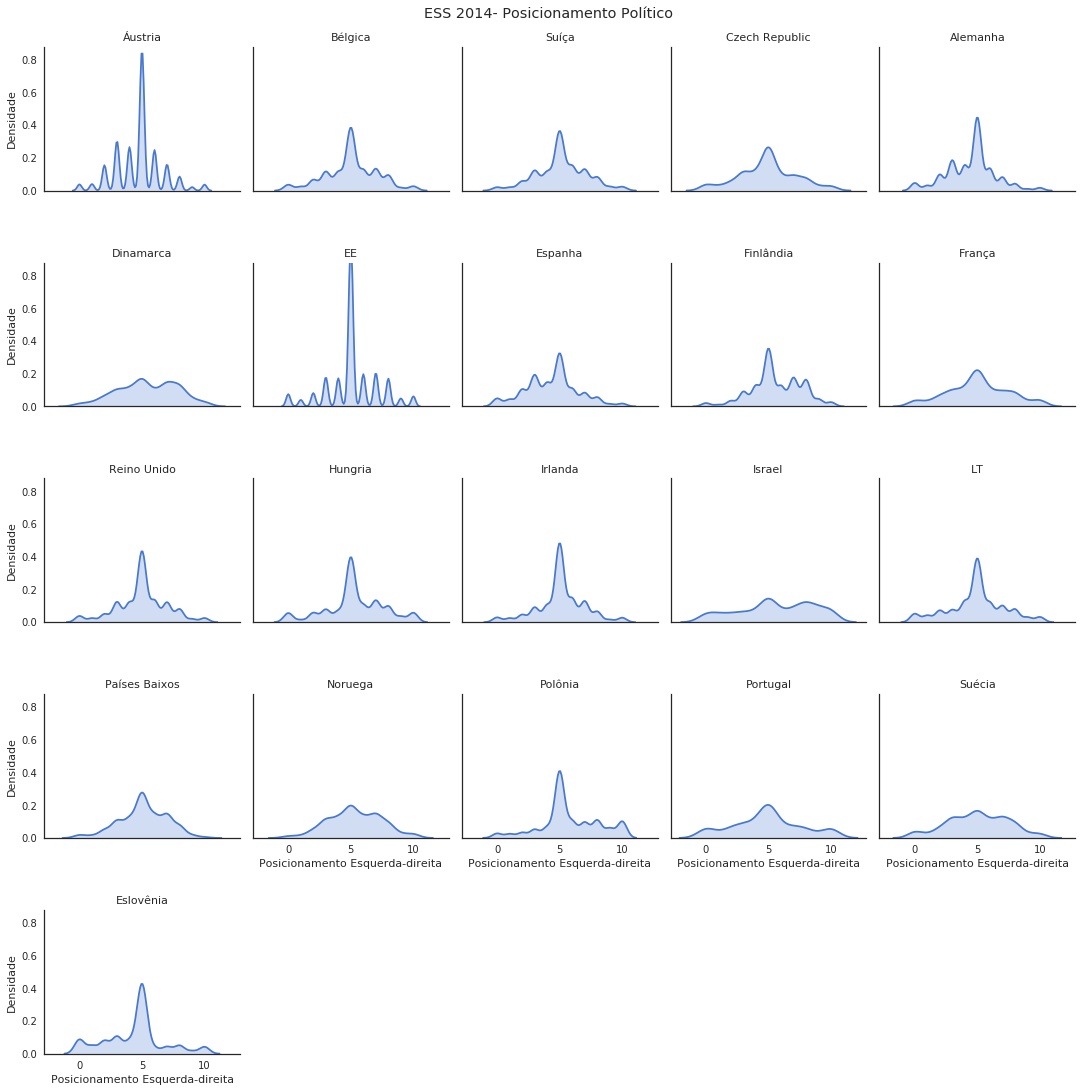

In [47]:
countries_plot(valid_ideo_2014,"país","value",2014)
